# Car Price Estimation Project

### Problem Description :

You are working as a Data Scientist in Carsperian, a car manufacturing company. The company has
recently decided to enter the US market and needs to plan a marketing / pricing strategy.
As the Data Analytics team you are asked to:
- Analyze which car models/specifications are more suitable for the market
- Give a reasonable estimate price with regards to the current market prices
Your manager has tasked you with this project and eager to impress your manager, you decided to 
analyze the existing competitors and collected all available market data. The dataset contains detailed 
information regarding the cars available on the market (such as its brand, model, horsepower, etc.) as 
well as their price. You will use this dataset to answer the questions below.

#### Question 1: Exploratory Data Analysis
Before diving into the modeling, you need to conduct data analysis to get a general view of the dataset
a) What does the dataset look like? How many records & features are there? 
b) Which data types are available?
c) What are the summary statistics for the numerical variables? 
(You don’t need to go into a detailed explanation, you can present the basic summary including 
mean, median, min, max, Q1 & Q3 percentiles etc.)
d) How many car brands are there within the dataset?
e) Are there any missing values? If there were, what methods would you used to fix this issue?
(You don’t need to go into detail, you can explain it in 2-3 sentences)

#### Question 2: Data Visualization
As you need to present your findings to all business stakeholders, you decided to create visuals that best 
explains the current car specifications available on the market. Using the variables available, create 3-5 
plots that are interesting to you, that gives insight on what types of cars we should be introducing to the
market? (Hint: Using different types of charts would be a plus!)

#### Question 3: Data Analysis & Modelling
Moving on to the modelling, you decided to use a Linear Regression model to estimate the price. (Due to 
company policy, you don’t need to use any categorical variables for modelling)
a) For feature selection, plot a correlation matrix and comment on your findings
b) The threshold correlation value is selected as 0.75, which variables will you include in the 
model? Are there any variable pairs that might be affected by multicollinearity? If so, how will 
you deal with this issue?
c) Now that you are done with feature selection, prepare the features for the model, (Hint: you
need to “scale” your variables) and split the dataset into test-train sets (30% and 70% 
respectively) 
d) Perform multiple linear regression? What are the model results? Are there any variables 
with p-values larger than 0.05? If so, how should you proceed? Please comment on your 
findings.
e) To automize the model process for later use, can you create a model pipeline that includes the 
following steps:
a. A class that performs all the necessary feature engineering & selection
b. Scales the data accordingly
c. Gets model output
How would you fit the training dataset and then get a prediction for test dataset using this 
pipeline?


In [93]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [210]:
#Read the file
data=pd.read_csv('car_price_data.csv')
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [126]:
#Shape of dataset
data.shape

(205, 26)

In [127]:
#Some information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [128]:
#Statistics information about numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Data Preprocessing

In [130]:
# The number of unique data in each column

for col in data.columns:
    print(col, data[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [131]:
# The values for categorical columns

for col in data.columns:
    values = []
    
    # categorical
    if col not in data.describe().columns:
        for val in data[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [132]:
data.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [133]:
model=data['CarName'].apply(lambda x: x.split(' '))
model

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [134]:
model=data['CarName'].apply(lambda x: x.split(' ')[0])
model

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [135]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [136]:
#Create a new dataframe to copy previous dataframe
df=data.copy()

In [137]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [138]:
# Drop CarName column from dataframe

df.drop(columns=['CarName'], axis=1, inplace=True)

In [139]:
# Insert to dataframe 'model' column 

df.insert(3, 'model', model)

In [32]:
df.head()

,car_ID,symboling,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [140]:
#Unique values of model column
df.model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Let's correct some mistakes in model column

In [144]:
#Replace model of cars which were written wrong
df.replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw':  'volkswagen',
}, inplace=True)

In [145]:
#Make lower model of cars
df.model=df.model.str.lower()

In [146]:
#Let's changes in the model column
df.model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [147]:
#Read the file
df.head()

,car_ID,symboling,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualize columns to get some general information

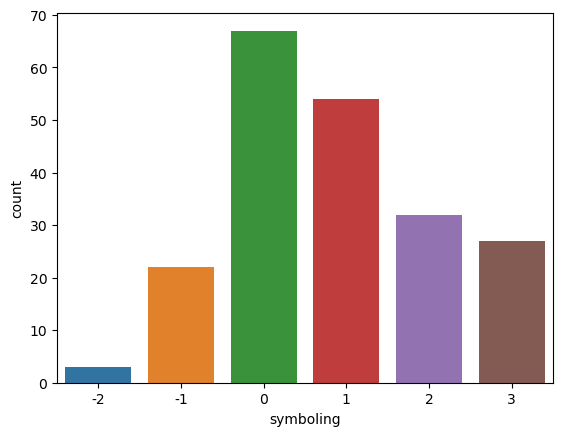

In [148]:
# symboling 

sns.countplot(df.symboling)
plt.show()

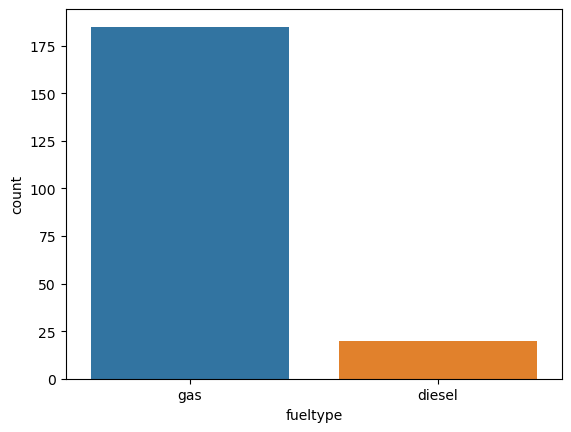

In [149]:
# fueltype

sns.countplot(df.fueltype)
plt.show()

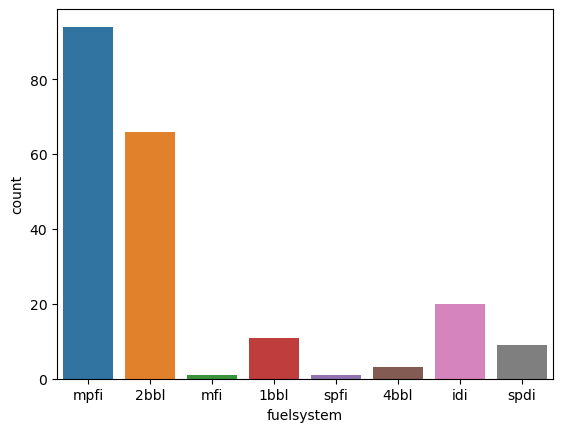

In [150]:
#fuelsystem
sns.countplot(df.fuelsystem)
plt.show()

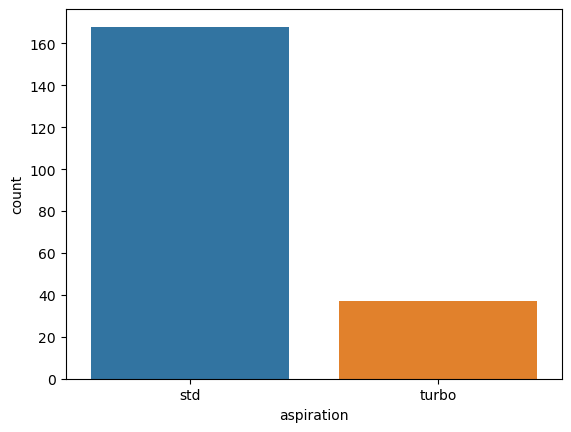

In [151]:
#aspiration
sns.countplot(df.aspiration)
plt.show()

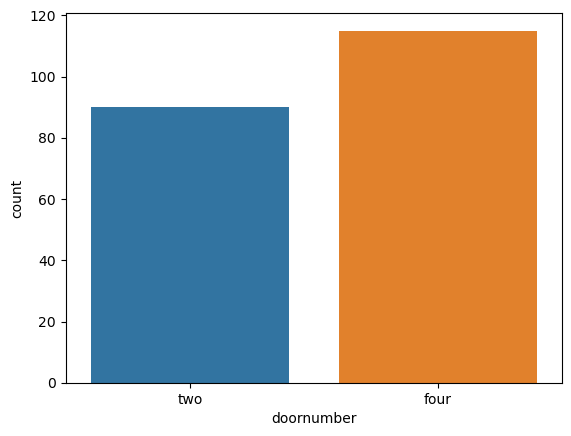

In [152]:
#doornumber
sns.countplot(df.doornumber)
plt.show()

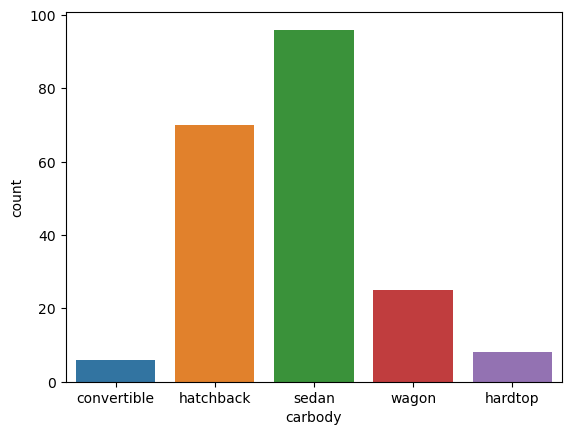

In [153]:
#carbody
sns.countplot(df.carbody)
plt.show()

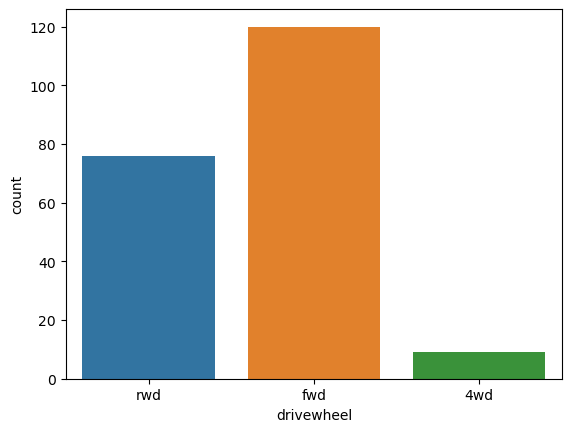

In [154]:
#carbody
sns.countplot(df.drivewheel)
plt.show()

# Let's see how independent variables affect the dependent variable

In [155]:
df.head()

,car_ID,symboling,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


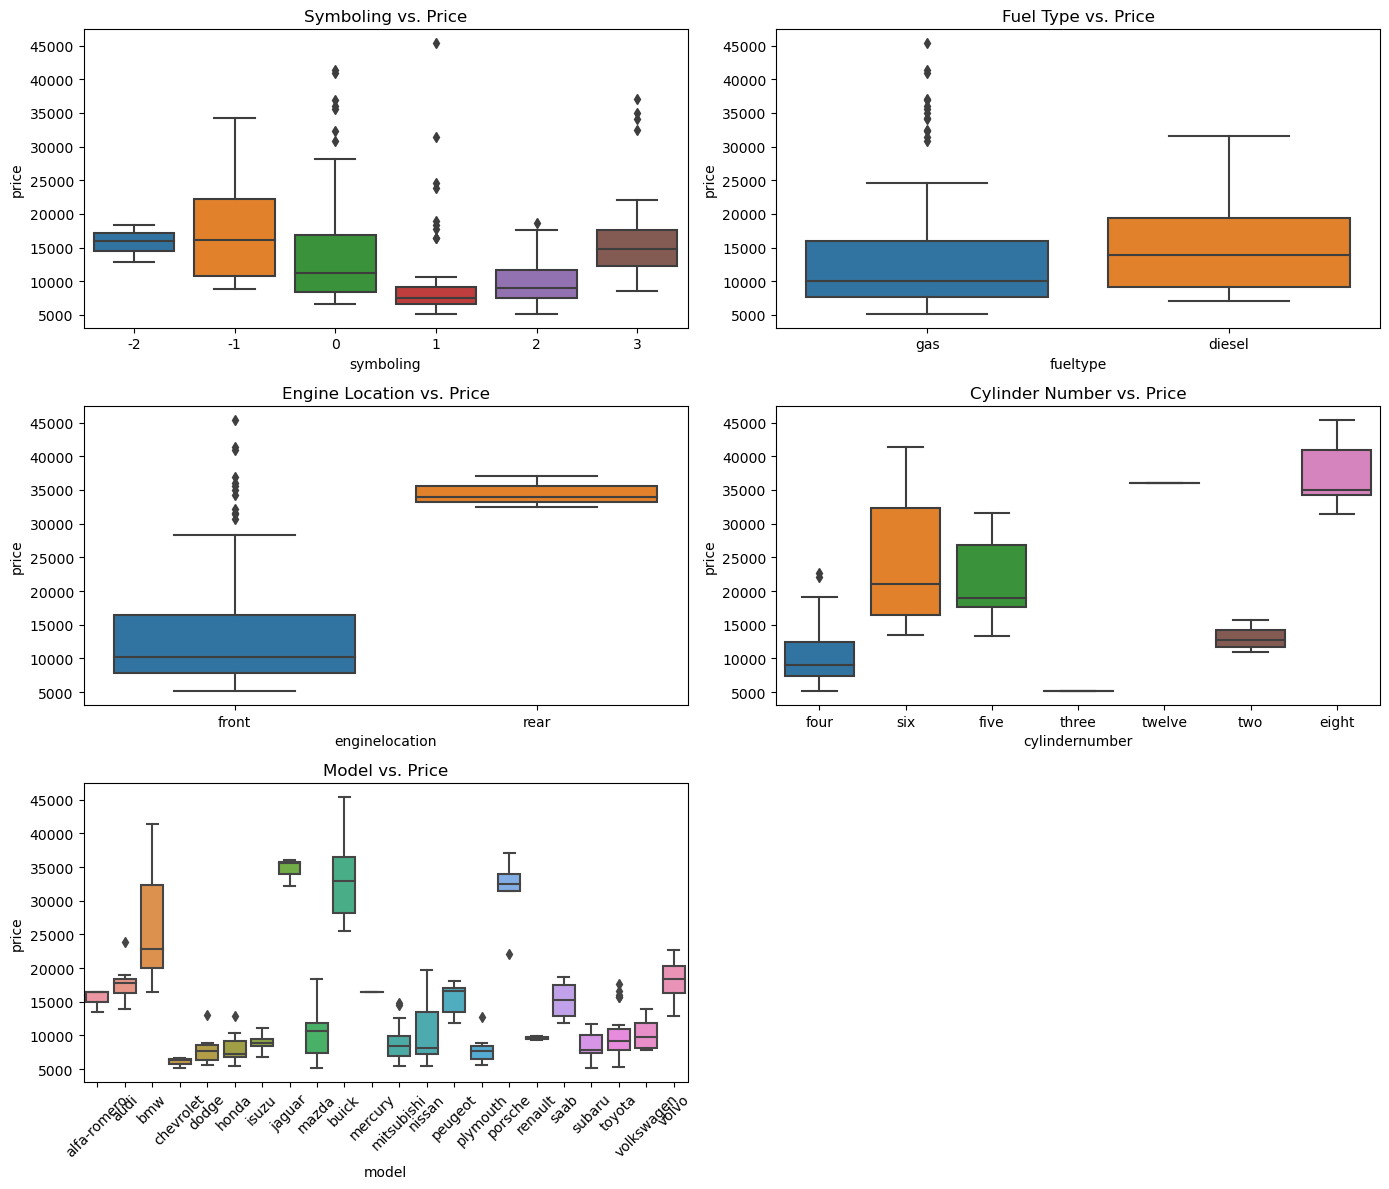

In [156]:
# Set the figure size for all variables
plt.figure(figsize=(14, 12)) 

# symboling and price
plt.subplot(321)  
sns.boxplot(x=df.symboling, y=df.price)
plt.title('Symboling vs. Price')

# fueltype and price
plt.subplot(322)  
sns.boxplot(x=df.fueltype, y=df.price)
plt.title('Fuel Type vs. Price')

# enginelocation and price
plt.subplot(323)  
sns.boxplot(x=df.enginelocation, y=df.price)
plt.title('Engine Location vs. Price')

# cylindernumber and price
plt.subplot(324) 
sns.boxplot(x=df.cylindernumber, y=df.price)
plt.title('Cylinder Number vs. Price')

# model and  price
plt.subplot(325)  
sns.boxplot(x=df.model, y=df.price)  
plt.xticks(rotation=45)
plt.title('Model vs. Price')


plt.tight_layout()
plt.show()

# Distribution of Price

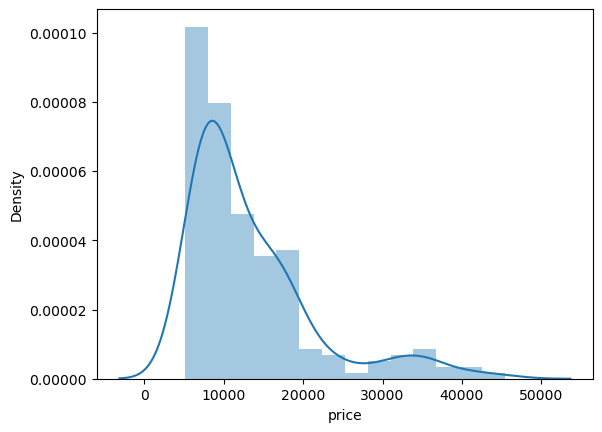

In [157]:
sns.distplot(df.price)
plt.show()

# Average price for each model

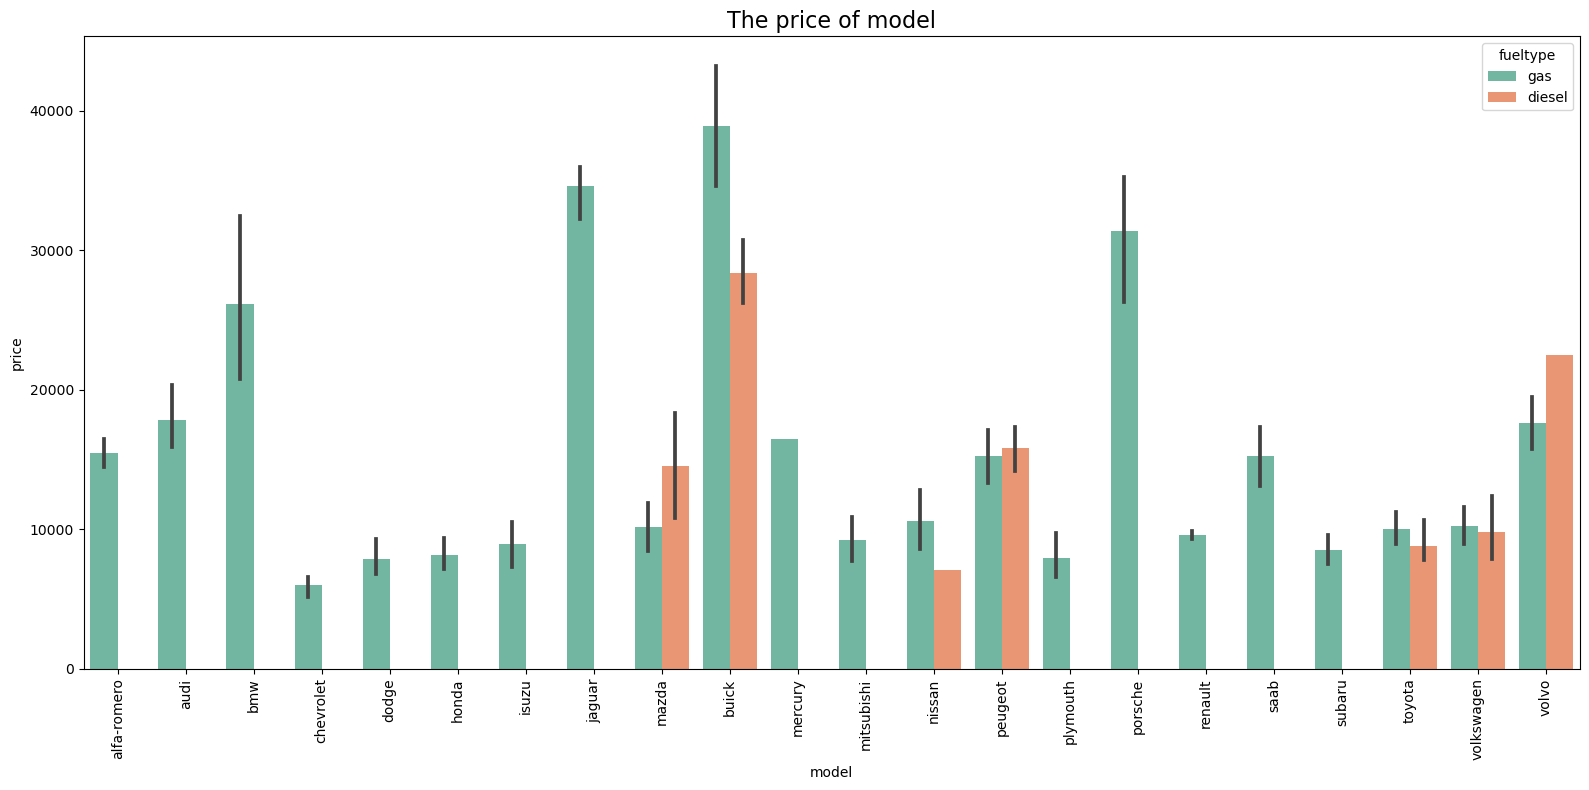

In [158]:
plt.figure(figsize=(16,8))
plt.title('The price of model', fontsize=16)
sns.barplot(x=df.model, y=df.price, 
            hue=df.fueltype, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()

In [159]:
#Read the file
df.head()

,car_ID,symboling,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [160]:
#Numerical columns
num_columns=[
    'car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
    'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
    'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]

In [161]:
len(num_columns)

15

# Let's see the relationship with regression lines

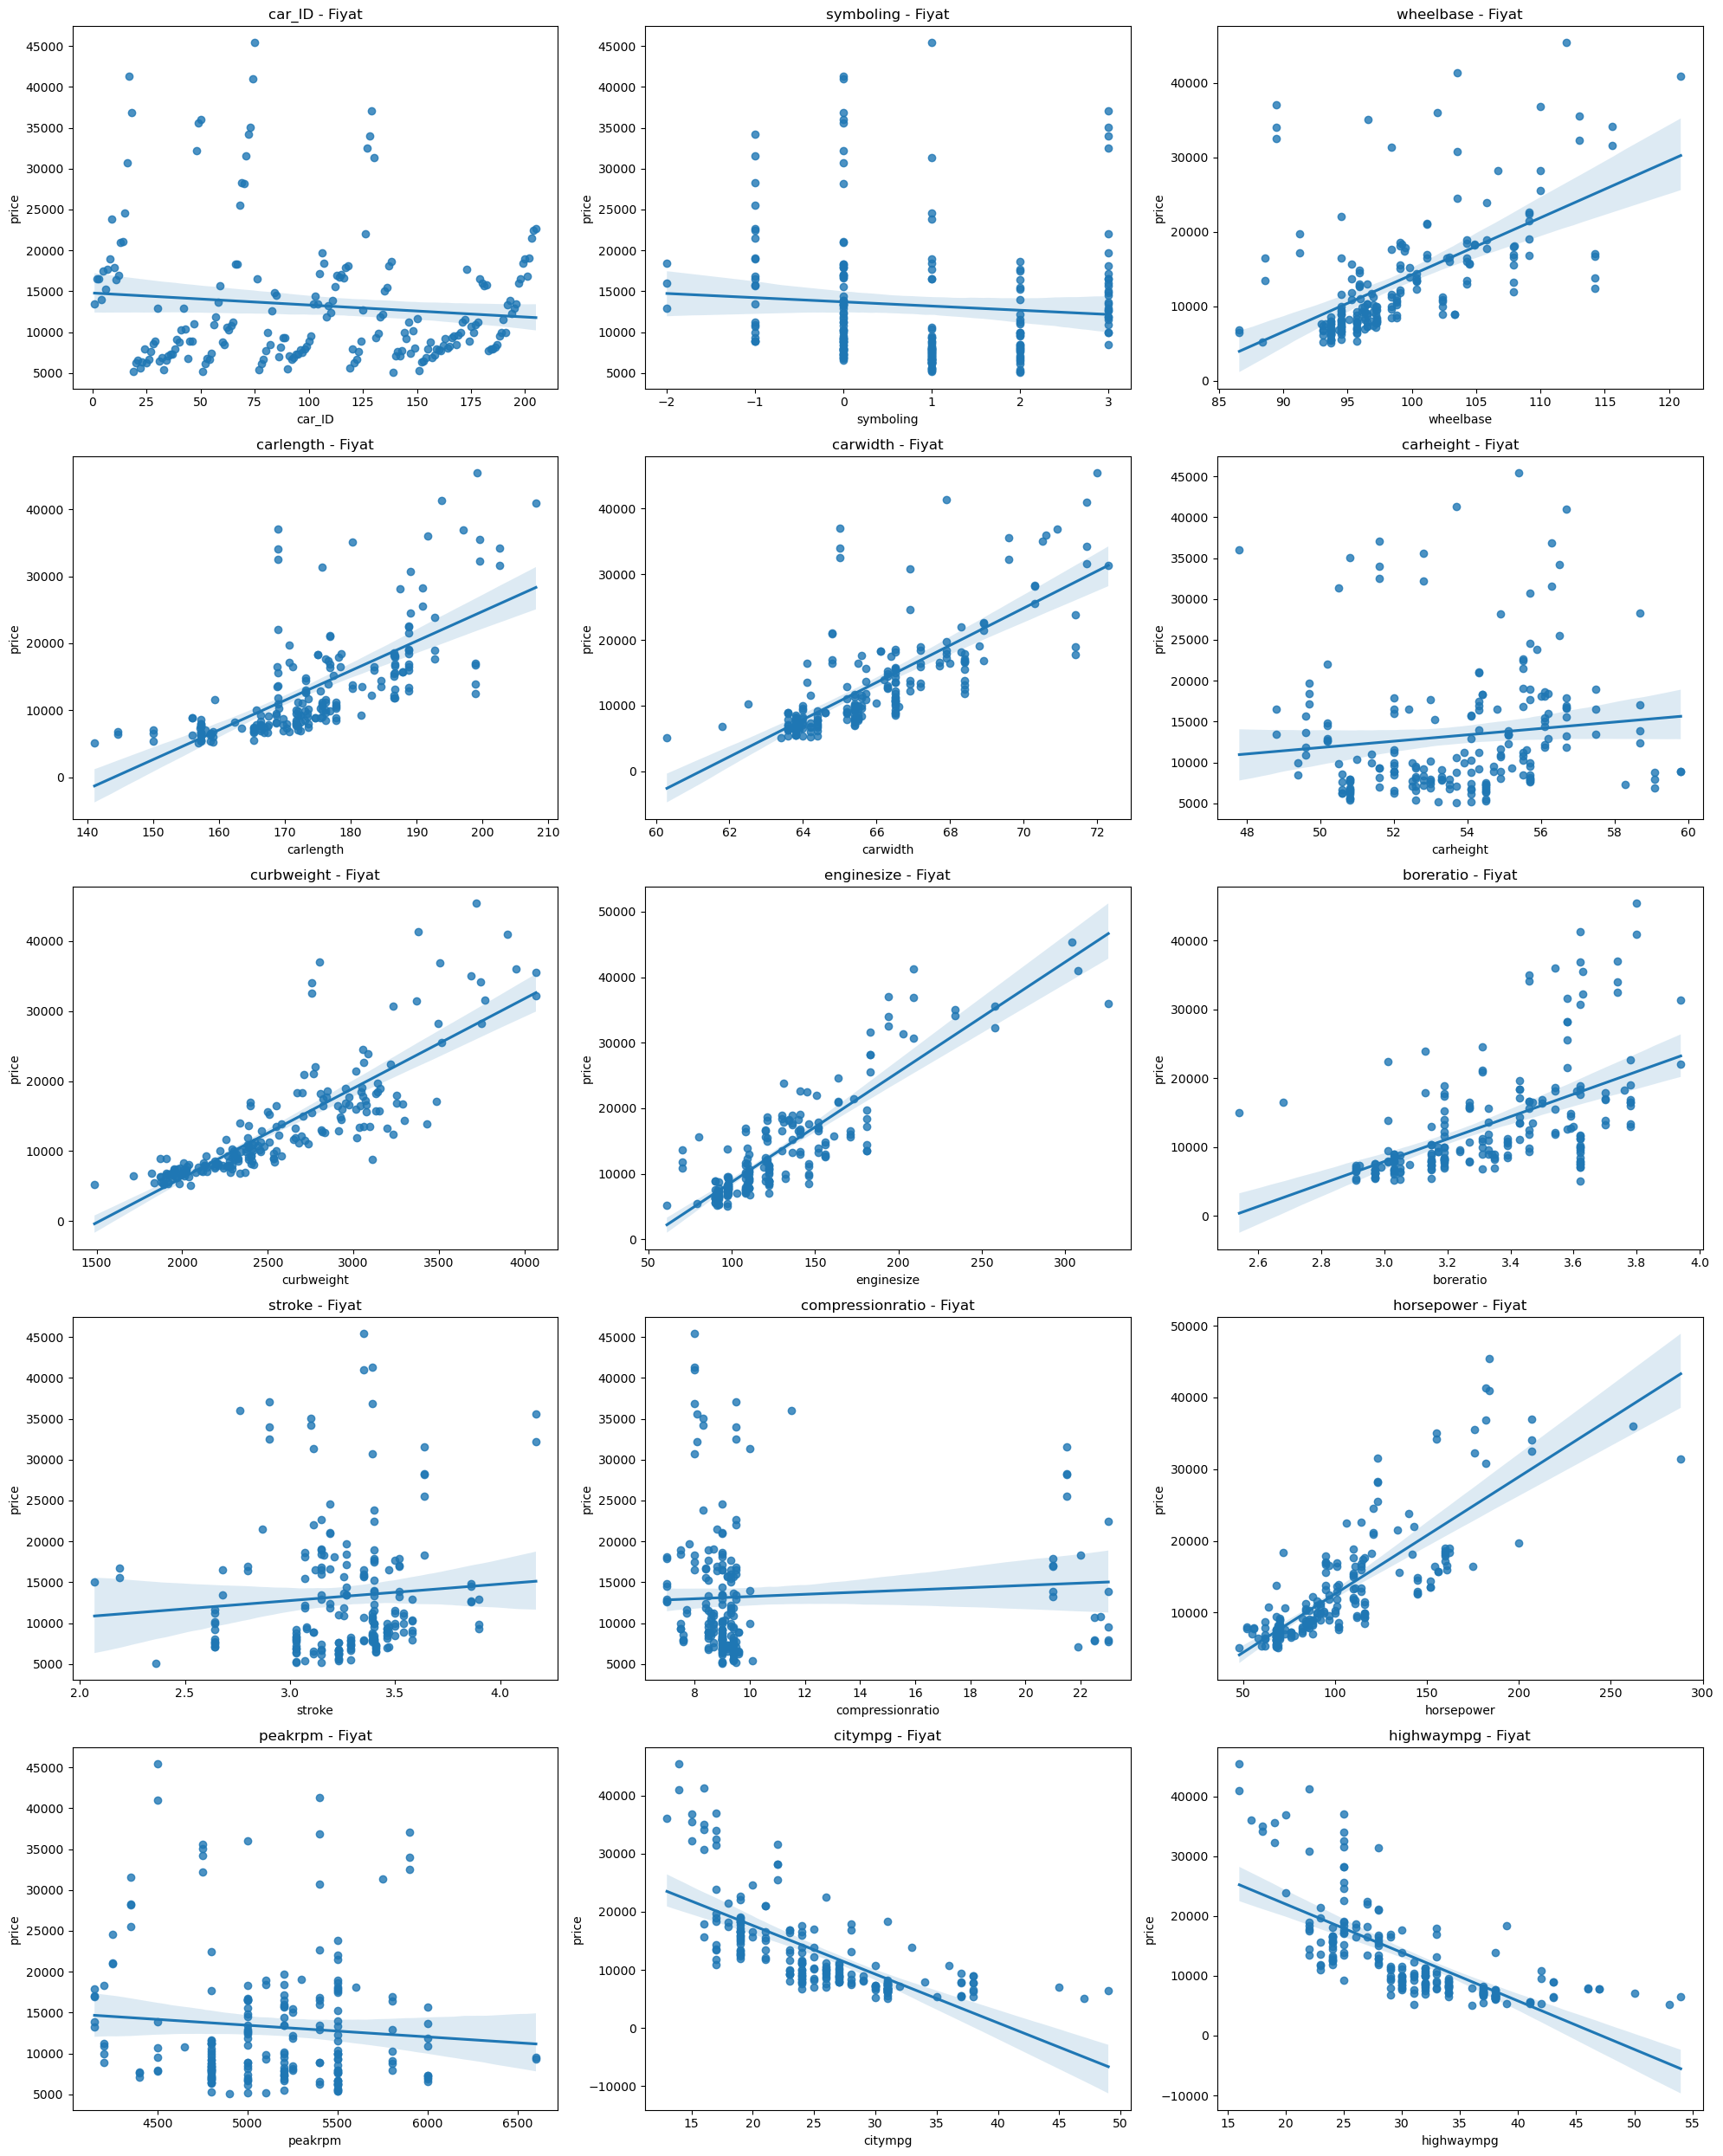

In [163]:
plt.figure(figsize=(20,25))

for i in range(len(num_columns)):
    plt.subplot(5,3,i+1)
    plt.title(num_columns[i] + ' - Fiyat')
    sns.regplot(x=eval('df' + '.' + num_columns[i]), y=df.price)
    
plt.tight_layout()

# Let's drop columns which do not have a relationship with the price 

# Columns : 
car_ID

symboling

carheight

stroke

compression ratio

peak rpm

highway mpg

city mpg

In [167]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'model', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [168]:
df1=df[['fueltype','model', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [169]:
df1.head()

,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


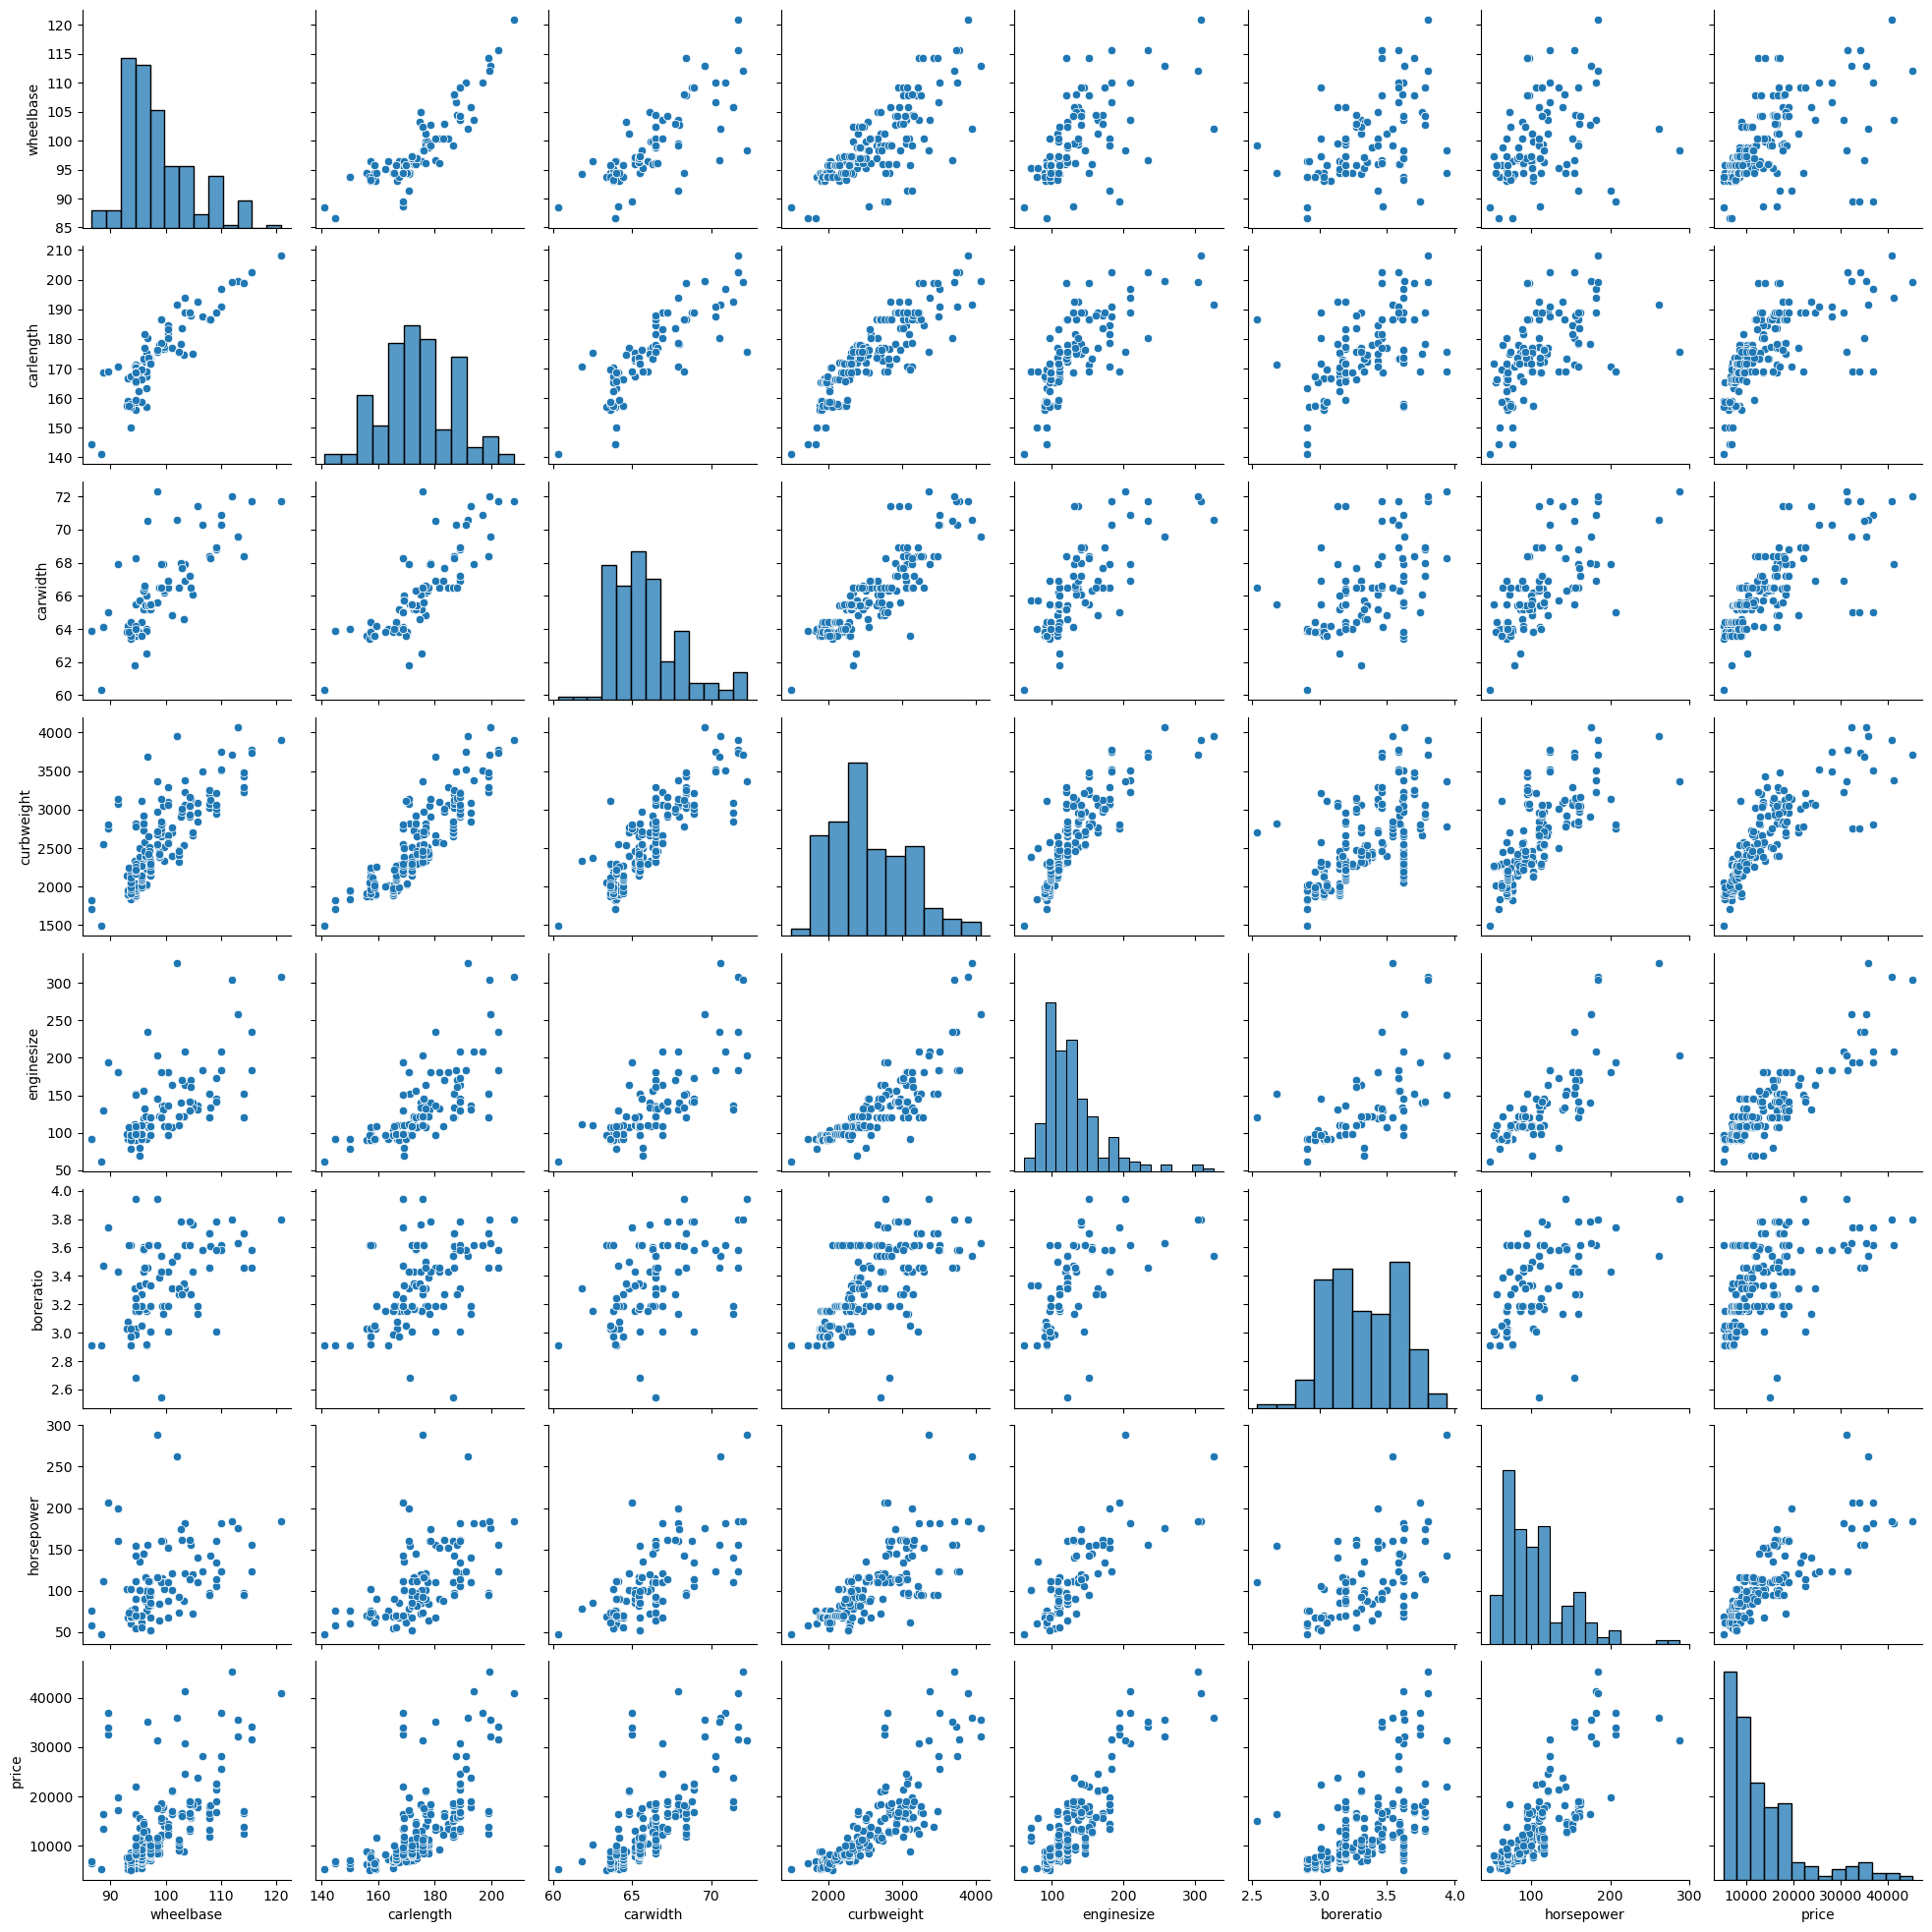

In [170]:
sns.pairplot(df1)
plt.show()

# Encode Categorical Columns

In [171]:
# Select categorical columns (object data type)
categorical_columns = df1.select_dtypes(include=['object'])

In [172]:
categorical_columns

,fueltype,model,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,gas,volvo,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,volvo,turbo,four,sedan,rwd,front,ohc,six,idi


In [173]:
categorical_columns_list = [
    'fueltype','model', 'aspiration', 'doornumber',
    'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
    'cylindernumber', 'fuelsystem'
]

In [174]:
for i in categorical_columns_list:
    
    df2 = pd.get_dummies(eval('df' + '.' + i), drop_first=True)
    
    df1 = pd.concat([df1, df2], axis=1)
    
    df1.drop([i], axis=1, inplace=True)

In [175]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,audi,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,1,...,0,0,0,0,0,0,0,1,0,0


# Train-Test Split

In [177]:
x_train, x_test = train_test_split(df1, train_size=0.7, random_state=11)

In [178]:
x_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,audi,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
69,106.7,187.5,70.3,3495,183,3.58,123,28176.0,0,0,...,0,0,0,0,0,1,0,0,0,0
128,89.5,168.9,65.0,2800,194,3.74,207,37028.0,1,0,...,0,0,0,0,0,0,0,1,0,0
193,100.4,183.1,66.9,2563,109,3.19,88,12290.0,1,0,...,0,0,0,0,0,0,0,1,0,0
32,93.7,150.0,64.0,1837,79,2.91,60,5399.0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,103.5,189.0,66.9,3230,209,3.62,182,30760.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [179]:
x_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,audi,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
93,94.5,170.2,63.8,2024,97,3.15,69,7349.0,1,0,...,0,0,0,1,0,0,0,0,0,0
56,95.3,169.0,65.7,2380,70,3.33,101,11845.0,1,0,...,0,0,1,0,1,0,0,0,0,0
197,104.3,188.8,67.2,3042,141,3.78,114,16515.0,1,0,...,0,0,0,0,0,0,0,1,0,0
156,95.7,166.3,64.4,2081,98,3.19,70,6938.0,1,0,...,0,0,0,1,0,0,0,0,0,0
22,93.7,157.3,63.8,1876,90,2.97,68,6377.0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [180]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'gas', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'turbo', 'two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

# Scaling Numerical Columns

In [181]:
scaler = MinMaxScaler()

In [182]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
numeric_columns

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0


In [183]:
# scale numeric columns except price column

scale_cols = ['wheelbase', 'carlength','carwidth','curbweight',
              'enginesize', 'horsepower','boreratio']

In [184]:
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])

In [185]:
x_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,audi,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
69,0.586006,0.692537,0.833333,0.778510,0.460377,0.650485,0.312500,28176.0,0,0,...,0,0,0,0,0,1,0,0,0,0
128,0.084548,0.414925,0.391667,0.508922,0.501887,0.805825,0.662500,37028.0,1,0,...,0,0,0,0,0,0,0,1,0,0
193,0.402332,0.626866,0.550000,0.416990,0.181132,0.271845,0.166667,12290.0,1,0,...,0,0,0,0,0,0,0,1,0,0
32,0.206997,0.132836,0.308333,0.135376,0.067925,0.000000,0.050000,5399.0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0.492711,0.714925,0.550000,0.675718,0.558491,0.689320,0.558333,30760.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [186]:
y_train =x_train.pop('price')

In [187]:
y_train.head()

69     28176.0
128    37028.0
193    12290.0
32      5399.0
15     30760.0
Name: price, dtype: float64

# Lineer Regression:

In [188]:
# Lineer Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# RFE (Recursive Feature Elimination):

In [189]:
# Let's select 10 features which are more important than others

rfe = RFE(estimator=lr, n_features_to_select=10)
rfe = rfe.fit(x_train,y_train)

In [190]:
rfe.support_

array([False, False,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False])

In [191]:
rfe.ranking_

array([ 6,  5,  1,  1,  1,  1,  3, 44, 37,  1, 42, 24, 18, 19, 27, 28, 26,
       16, 15, 25,  7, 17,  1, 21, 33, 14, 20, 22, 29, 32, 38, 12, 10, 11,
        9, 40, 31,  1,  2, 39, 35, 13, 43,  1, 34, 23,  4,  1,  1,  8, 30,
       36, 41, 47, 45, 46, 48])

In [192]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 6),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', False, 3),
 ('gas', False, 44),
 ('audi', False, 37),
 ('bmw', True, 1),
 ('buick', False, 42),
 ('chevrolet', False, 24),
 ('dodge', False, 18),
 ('honda', False, 19),
 ('isuzu', False, 27),
 ('jaguar', False, 28),
 ('mazda', False, 26),
 ('mercury', False, 16),
 ('mitsubishi', False, 15),
 ('nissan', False, 25),
 ('peugeot', False, 7),
 ('plymouth', False, 17),
 ('porsche', True, 1),
 ('renault', False, 21),
 ('saab', False, 33),
 ('subaru', False, 14),
 ('toyota', False, 20),
 ('volkswagen', False, 22),
 ('volvo', False, 29),
 ('turbo', False, 32),
 ('two', False, 38),
 ('hardtop', False, 12),
 ('hatchback', False, 10),
 ('sedan', False, 11),
 ('wagon', False, 9),
 ('fwd', False, 40),
 ('rwd', False, 31),
 ('rear', True, 1),
 ('dohcv', False, 2),
 ('l', False, 39),
 ('ohc', False, 35),
 ('ohcf', False, 13),
 ('ohcv',

In [193]:
# only selected rows (variables)
x_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'bmw', 'porsche',
       'rear', 'rotor', 'three', 'twelve'],
      dtype='object')

In [194]:
# the important columns

x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe

,carwidth,curbweight,enginesize,boreratio,bmw,porsche,rear,rotor,three,twelve
69,0.833333,0.778510,0.460377,0.650485,0,0,0,0,0,0
128,0.391667,0.508922,0.501887,0.805825,0,1,1,0,0,0
193,0.550000,0.416990,0.181132,0.271845,0,0,0,0,0,0
32,0.308333,0.135376,0.067925,0.000000,0,0,0,0,0,0
15,0.550000,0.675718,0.558491,0.689320,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
81,0.425000,0.325834,0.230189,0.427184,0,0,0,0,0,0
91,0.291667,0.166796,0.135849,0.233010,0,0,0,0,0,0
80,0.425000,0.342126,0.184906,0.252427,0,0,0,0,0,0
191,0.550000,0.455004,0.283019,0.271845,0,0,0,0,0,0


# Analysis of OLS

In [195]:
# statsmodels için add_constant -> beta_0 için 1'lerden oluşan sütun

x_train_rfe = sm.add_constant(x_train_rfe)

In [196]:
# Let's run OLS

lr = sm.OLS(y_train, x_train_rfe).fit()

In [197]:
# Summary of OLS

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.76e-67
Time:                        00:24:44   Log-Likelihood:                -1313.5
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     132   BIC:                             2682.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1902.2068    587.589     -3.237      0.0

The p-value of the variable named 'twelve' is greater than 0.05. Therefore, it is unimportant, we can remove it.

In [198]:
x_train_rfe = x_train_rfe.drop(['twelve'],axis=1)

We'll run an OLS again.

Let's do this in a function:

In [199]:
def x_train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())

In [200]:
#let's run again

x_train_ols(x_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     166.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           7.80e-68
Time:                        00:26:37   Log-Likelihood:                -1315.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     133   BIC:                             2681.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1886.0469    593.265     -3.179      0.0

We can keep other features because the p-value of them is under 0.05

# Importance of Coefficients

In [201]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'gas', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'turbo', 'two', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [202]:
x_train_important=x_train[['carwidth','curbweight', 'enginesize', 'boreratio', 'bmw',
       'porsche','rear', 'rotor','three']]

In [203]:
x_train_important.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'bmw', 'porsche',
       'rear', 'rotor', 'three'],
      dtype='object')

In [204]:
x_train_important.head()

,carwidth,curbweight,enginesize,boreratio,bmw,porsche,rear,rotor,three
69,0.833333,0.778510,0.460377,0.650485,0,0,0,0,0
128,0.391667,0.508922,0.501887,0.805825,0,1,1,0,0
193,0.550000,0.416990,0.181132,0.271845,0,0,0,0,0
32,0.308333,0.135376,0.067925,0.000000,0,0,0,0,0
15,0.550000,0.675718,0.558491,0.689320,1,0,0,0,0


In [205]:
#Final Linear Regression
lr_final = LinearRegression()
lr_final.fit(x_train_important, y_train)

LinearRegression()

In [207]:
lr_final.coef_

array([13238.62471277,  7269.37267302, 25361.26560259, -2753.77289714,
        7294.91724688,  4748.82830364, 14771.12498232,  7665.25050297,
        7037.04692765])

In [208]:
coefficients= pd.DataFrame(lr_final.coef_, index = ['carwidth', 'curbweight', 'enginesize', 'boreratio', 'bmw', 'porsche',
       'rear', 'rotor', 'three'], columns=['coefficients'])

In [209]:
coefficients.sort_values(by=['coefficients'], ascending=False)

,coefficients
enginesize,25361.265603
rear,14771.124982
carwidth,13238.624713
rotor,7665.250503
bmw,7294.917247
curbweight,7269.372673
three,7037.046928
porsche,4748.828304
boreratio,-2753.772897


The most important variables are below which affects the price. If compnay wants to get a high profit then it is required to check important variables to get in market.

* enginesize
* rear
* carwidth
* rotor
* bmw
* curbweight
* three
* porsche
* boreratio

In [211]:
import pickle

In [212]:
# Convert model to pickle format
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)